<a href="https://colab.research.google.com/github/Sirabhop/Preclinical-AD-EEG-classification/blob/master/EEG_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library installation**


In [1]:
!pip install mne

     |████████████████████████████████| 6.6MB 38.6MB/s 


In [2]:
pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-ryya2upi
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-ryya2upi
  Created wheel for entropy: filename=entropy-0.1.1-cp36-none-any.whl size=15459 sha256=ab4a1d2b39f8344b76f0e0c3fad70aef33bdbeebac19dec6e463b565fdd66b16
  Stored in directory: /tmp/pip-ephem-wheel-cache-geer50ld/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


In [3]:
pip install git+https://github.com/nice-tools/nice.git

  Cloning https://github.com/nice-tools/nice.git to /tmp/pip-req-build-knngd_ad
  Running command git clone -q https://github.com/nice-tools/nice.git /tmp/pip-req-build-knngd_ad
  Created wheel for nice: filename=nice-0.1.dev0-cp36-none-any.whl size=53945 sha256=769760961d11ba5f97059b268c915aed4e9d964234e76d000ac8fbb7ea152fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-i05js8r2/wheels/50/a0/a3/2d473364ff7f9fdd3d41b0da4b4e34ef98c713cfa30695c2b0
Successfully built nice


# **Import Data**

In [0]:
import os
import mne
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Set working directory
os.chdir("/content/drive/My Drive/EEG Data")

In [0]:
eog_chs = ('Leye','Reye','UBlink','DBlink','LMast','RMast')
trigger = ('Status')
#Exclude; Gsr = Skin conductance, Resp = Respiration belt, Plet = plethismograph (Blood pressure, HR), Temp = thermometer
exclude_chs = ('EXG7','EXG8','GSR1','GSR2','Erg1','Erg2','Resp','Plet','Temp') 
subjects = ('SS1', 'SS2', 'SS3', 'SS4', 'SS5', 'SS6', 'SS7', 'SS8')
chn_names = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3',
            'O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8',
            'AF4','Fp2','Fz','Cz']

In [0]:
raw = mne.io.read_raw_bdf("SS8.bdf", eog = eog_chs, stim_channel = trigger, exclude = exclude_chs, preload = True)
#Measurement Information
raw.info

Opening raw data file SS3_e.fif...


<ipython-input-36-2e12763cf7ac>:1: RuntimeWarning: This filename (SS3_e.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif("SS3_e.fif", preload = True)


Isotrak not found
    Range : 0 ... 4306943 =      0.000 ...  2103.000 secs
Ready.
Reading 0 ... 4306943  =      0.000 ...  2103.000 secs...


<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7-0, F3-0, FC1, FC5, T7, C3-0, CP1, CP5, P7, P3, Pz, ...
 chs: 38 EEG, 6 EOG, 1 STIM
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2020-03-12 13:44:49 UTC
 meas_id: 4 items (dict)
 nchan: 45
 projs: []
 sfreq: 2048.0 Hz
>

In [0]:
#Band-Pass Filtering at 0.5 and 45
raw.filter(l_freq = 0.5, h_freq = 45)
#Notch Filtering at 50 and 100
raw.notch_filter(freqs = (50, 100))

# **Data Preprocessing**


- **Ocular artifacts (EOG)**
repairing artifact with SSP EOG

In [0]:
from mne.preprocessing import compute_proj_eog

In [0]:
eog_projs, _ = compute_proj_eog(raw, n_eeg = 1, reject=None, no_proj=True)

Running EOG SSP computation
EOG channel index for this subject is: [32 33 34 35 36 37]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 32768 samples (16.000 sec)

Now detecting blinks and generating corresponding events
Found 92 significant peaks
Number of EOG events detected : 92
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass f

- **Compare with SSP EOG denoising and without denoising**


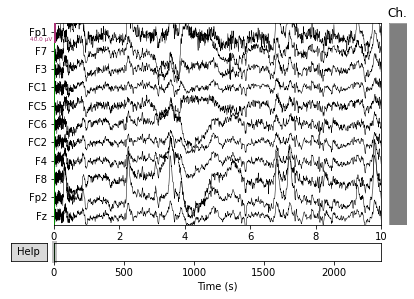

1 projection items deactivated


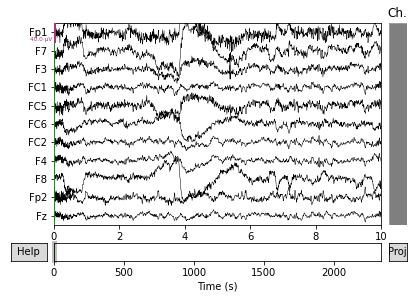

In [0]:
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp = ('Fp*'))
for title in ('Without', 'With'):
    if title == 'With':
        raw.add_proj(eog_projs)
    fig = raw.plot(order=artifact_picks, n_channels=len(artifact_picks))
    fig.subplots_adjust(top=0.9)  # make room for title
    fig.suptitle('{} EOG projectors'.format(title), size='xx-large',
                 weight='bold')

In [0]:
#Apply projection
raw.add_proj(eog_projs)

1 projection items deactivated


<RawEDF | SS8.bdf, 39 x 4790272 (2339.0 s), ~1.39 GB, data loaded>

*   **Epoching**

In [0]:
events = mne.find_events(raw, stim_channel=trigger)
event_dict = {'IR_en':2, 'IR_ct1':3, 'IR_fr':4,'IR_ct2':5, 'IR_cr':6, 'IR_rc':7,
              'WCST_start':8, 'WCST_end':9, 
              'DR_ct1':10, 'DR_fr':11,'DR_ct2':12, 'DR_cr':13, 'DR_ct3':14, #Missed when recognition
              'MoCA':15}
#Visualize event ID
#fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'], first_samp=raw.first_samp)

Trigger channel has a non-zero initial value of 65537 (consider using initial_event=True to detect this event)
7 events found
Event IDs: [2 3 4 5 6 7 8]


In [0]:
data = mne.Epochs(raw, events)#, event_id = event_dict , preload = True)

7 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


# **Feature Extraction**

### **1) Power Spectral Density (PSD)** x5
*Delta (1-4Hz), Theta (4-8Hz), Alpha (8-12Hz), Beta (12-30Hz), Gamma (30-45Hz; Gaubert et al., 2019)*

In [0]:
def psd(data, method):
  from mne.time_frequency import psd_welch

  psd_delta, freq_delta   = mne.time_frequency.psd_welch(data, fmin = 1, fmax = 4)
  psd_theta, freq_theta   = mne.time_frequency.psd_welch(data, fmin = 4, fmax = 8)
  psd_alpha, freq_alpha   = mne.time_frequency.psd_welch(data, fmin = 8, fmax = 12)
  psd_beta, freq_beta     = mne.time_frequency.psd_welch(data, fmin = 12, fmax = 30)
  psd_gamma, freq_gamma   = mne.time_frequency.psd_welch(data, fmin = 30, fmax = 45)

  if method == 'mean':
    psds_m_d = np.mean(psd_delta)
    psds_m_th = np.mean(psd_theta)
    psds_m_al = np.mean(psd_alpha)
    psds_m_be = np.mean(psd_beta)
    psds_m_gm = np.mean(psd_gamma)
  elif method == 'median':
    psds_m_d = np.median(psd_delta)
    psds_m_th = np.median(psd_theta)
    psds_m_al = np.median(psd_alpha)
    psds_m_be = np.median(psd_beta)
    psds_m_gm = np.median(psd_gamma)
  psd_list = [psds_m_d, psds_m_th, psds_m_al, psds_m_be, psds_m_gm]
  return psd_list

In [0]:
#Test
psd(data, 'mean')

### **2) Median Spectral Frequency (MSF)** x1

In [0]:
def MSF(data):
  from mne.time_frequency import psd_welch
  
  psd_total, freq_total = mne.time_frequency.psd_welch(data, fmin = 1, fmax = 40)
  psd_m_total = np.median(psd_total)
  return psd_m_total

In [0]:
#Test
MSF(data)

Effective window size : 0.125 (s)


5.863784124730185e-13

### **3) Spectral Entropy (SE)** x1


Using [Shannon entropy of the PSD of data (Inouye, T. et al. (1991)](https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html#entropy.spectral_entropy)


In [0]:
def SpectralEntropy(data):
  import entropy

  #Convert mne object to dataframe
  #ch_names = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3',
   #         'O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8',
    #        'AF4','Fp2','Fz','Cz'] #32 electrodes
  df = data.to_data_frame(index = None)

  #Convert dataframe to array
  for x in data.info['ch_names']:
    array = np.array(df[x])
    array = np.concatenate([array, array])

  #Calculate entropy
  Spectral_Entropy = entropy.spectral_entropy(array, sf = 1000, method = 'welch')
  return Spectral_Entropy

In [0]:
#Test
SpectralEntropy(data)

Loading data for 7 events and 1435 original time points ...


2.4839608140291176

### **4) Algorithmic Complexity (AC)** x1
Estimated using Kolmogorov Complexity

In [0]:
def AlgorithmicComplexity(data):
  from nice.algorithms.information_theory import epochs_compute_komplexity
  import math
  #nbins = Number of bins to use for symbolic transformation
  #Only {0,1,2,3,4,5,6,7,8,9} so n = 10 -> the bit would be log2_10
  AC = epochs_compute_komplexity(data, nbins = math.log2(10))
  AC = pd.DataFrame(AC).mean().mean()
  return AC

In [0]:
#Test
AlgorithmicComplexity(data)

Running KolmogorovComplexity
Elapsed time 0.6111586093902588 sec


0.12810633399701346

### **5) Functional Connectivity (wSMI)** x2
 weighted mutual symbolic information (wSMI) were summarized by calculating the median value from each electrodes
1.   wSMI of theta 
2.   wSMI of alpha



In [0]:
def wSMI(data, method):
  from nice.algorithms.connectivity import epochs_compute_wsmi
  from mne import filter

  #Filter data
  raw_theta = raw
  raw_theta.filter(l_freq = 4, h_freq = 8)
  raw_alpha = raw
  raw_alpha.filter(l_freq = 8, h_freq = 12)

  events = mne.find_events(raw, stim_channel=trigger)

  #Epoching
  data_theta = mne.Epochs(raw_theta, events , preload = True)
  data_alpha = mne.Epochs(raw_alpha, events , preload = True)

  #wSMI
  wsmi_t, smi_t, sym_t, count_t = epochs_compute_wsmi(data_theta, kernel = 3, tau = 21, method_params = {'bypass_csd': True})
  wsmi_a, smi_a, sym_a, count_a = epochs_compute_wsmi(data_alpha, kernel = 3, tau = 41, method_params = {'bypass_csd': True})
  
  #Method
  if method == 'mean':
    wsmi = [np.mean(wsmi_t), np.mean(wsmi_a)]
  elif method == 'median':
    wsmi = [np.median(wsmi_t), np.median(wsmi_a)]
  return wsmi

In [0]:
#Test
wSMI(data, 'mean')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 3379 samples (1.650 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12

0.04250062308722933

# **Buiding DataFrame**

In [0]:
def getDataFrame_bdf(subjectID):
  EEG_feature_names = ['id', 'PSD_Delta', 'PSD_Theta', 'PSD_Alpha', 'PSD_Beta', 'PSD_Gamma', 'MSF', 'SE', 'AC', 'wSMI_Alpha', 'wSMI_Theta']
  df = pd.DataFrame(None, columns = EEG_feature_names)

  from mne.preprocessing import compute_proj_eog

  os.chdir('/content/drive/My Drive/EEG Data')
  
  eog_chs = ('Leye','Reye','UBlink','DBlink','LMast','RMast')
  trigger = ('Status')
  #Exclude; Gsr = Skin conductance, Resp = Respiration belt, Plet = plethismograph (Blood pressure, HR), Temp = thermometer
  exclude_chs = ('EXG7','EXG8','GSR1','GSR2','Erg1','Erg2','Resp','Plet','Temp') 
  subjects = ('SS1', 'SS2', 'SS3', 'SS4', 'SS5', 'SS6', 'SS7', 'SS8')
  chn_names = ['Fp1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3',
               'Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8',
               'FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']

  #Subject ID expected to be list
  for SS in subjectID:
    raw = mne.io.read_raw_bdf(SS+'.bdf', exclude = exclude_chs, eog = eog_chs, stim_channel = trigger, preload = True)
    
    #Filter
    raw.filter(l_freq = 0.5, h_freq = 45)
    raw.notch_filter(freqs = (50, 100))

    #Denosing SSP
    eog_projs, _ = compute_proj_eog(raw, n_eeg = 1, reject=None, no_proj=True)
    raw.add_proj(eog_projs)

    #Epoching
    events = mne.find_events(raw, stim_channel=trigger)
    epoch = mne.Epochs(raw, events, preload = True)

    #5 fetures
    features = {'id': None, 'PSD_Delta': None, 'PSD_Theta': None, 'PSD_Alpha': None, 'PSD_Beta': None,
                'PSD_Gamma': None, 'MSF': None, 'SE': None, 'AC': None, 'wSMI_Alpha': None, 'wSMI_Theta': None}    
    psd_total = psd(epoch, 'mean')

    features['id'] = SS
    features['PSD_Delta'] = psd_total[0]
    features['PSD_Theta'] = psd_total[1]
    features['PSD_Alpha'] = psd_total[2]
    features['PSD_Beta'] = psd_total[3]
    features['PSD_Gamma'] = psd_total[4]
    features['MSF'] = MSF(epoch)
    features['SE'] = SpectralEntropy(epoch)
    features['AC'] = AlgorithmicComplexity(epoch)

    wSMI_total = wSMI(epoch, 'mean')
    features['wSMI_Theta'] = wSMI_total[0]
    features['wSMI_Alpha'] = wSMI_total[1]

    #Build DataFrame
    df = df.append(features, ignore_index = True)
  return df

In [0]:
def getDataFrame_fif(subjectID):
  EEG_feature_names = ['id', 'PSD_Delta', 'PSD_Theta', 'PSD_Alpha', 'PSD_Beta', 'PSD_Gamma', 'MSF', 'SE', 'AC', 'wSMI_Alpha', 'wSMI_Theta']
  df = pd.DataFrame(None, columns = EEG_feature_names)

  from mne.preprocessing import compute_proj_eog

  os.chdir('/content/drive/My Drive/EEG Data')

  #Subject ID expected to be list
  for SS in subjectID:
    raw = mne.io.read_raw_fif(SS+'.fif', preload = True)
    #Filter
    raw.filter(l_freq = 0.5, h_freq = 45)
    raw.notch_filter(freqs = (50, 100))

    #Denosing SSP
    eog_projs, _ = compute_proj_eog(raw, n_eeg = 1, reject=None, no_proj=True)
    raw.add_proj(eog_projs)

    #Epoching
    events = mne.find_events(raw, stim_channel=trigger)
    epoch = mne.Epochs(raw, events , preload = True)

    #5 fetures
    features = {'id': None, 'PSD_Delta': None, 'PSD_Theta': None, 'PSD_Alpha': None, 'PSD_Beta': None,
                'PSD_Gamma': None, 'MSF': None, 'SE': None, 'AC': None, 'wSMI_Alpha': None, 'wSMI_Theta': None}    
    psd_total = psd(epoch, 'mean')

    features['id'] = SS
    features['PSD_Delta'] = psd_total[0]
    features['PSD_Theta'] = psd_total[1]
    features['PSD_Alpha'] = psd_total[2]
    features['PSD_Beta'] = psd_total[3]
    features['PSD_Gamma'] = psd_total[4]
    features['MSF'] = MSF(epoch)
    features['SE'] = SpectralEntropy(epoch)
    features['AC'] = AlgorithmicComplexity(epoch)

    wSMI_total = wSMI(epoch, 'mean')
    features['wSMI_Theta'] = wSMI_total[0]
    features['wSMI_Alpha'] = wSMI_total[1]

    #Build DataFrame
    df = df.append(features, ignore_index = True)
  return df

In [0]:
#Compute EEG feature
subjectID_fif = ['SS1', 'SS2', 'SS3']
df = getDataFrame_fif(subjectID_fif)

subjectID_bdf = ['SS4', 'SS5', 'SS6', 'SS7', 'SS8']
df2 = getDataFrame_bdf(subjectID_bdf)

df = df.append(df2, ignore_index = True)

#Export EEG feature
df.to_csv('EEG_features.csv')

In [93]:
#Import data
FCSRT = pd.read_csv("FCSRT.csv")
FCSRT.drop('id', axis = 1, inplace = True)
MoCA = pd.read_csv("MoCA.csv", usecols = ['SUM'])
EEG = pd.read_csv("EEG_features.csv")

df_original = pd.concat([EEG,FCSRT,MoCA], axis = 1)
df_original.drop(['Unnamed: 0'], inplace = True, axis = 1)
df_original.rename(columns = {'SUM':'MoCA'})

,id,PSD_Delta,PSD_Theta,PSD_Alpha,PSD_Beta,PSD_Gamma,MSF,SE,AC,wSMI_Alpha,wSMI_Theta,IR-FreeR,IR-CuedR,DL-FreeR,DL-CuedR,MoCA
0,SS1,NaN,7.279026e-12,7.279026e-12,1.973301e-12,1.858662e-12,2.040890e-13,2.513122,0.047027,0.061248,0.029890,6,8,7,5,21
1,SS2,NaN,1.462029e-12,1.462029e-12,8.044949e-13,3.229391e-13,3.377435e-13,2.476574,0.052528,0.069825,0.033773,7,5,9,5,7
2,SS3,NaN,1.932887e-12,1.932887e-12,3.683971e-12,7.096728e-12,5.726507e-13,2.483961,0.064709,0.075091,0.036253,11,4,11,4,9
3,SS4,NaN,2.068102e-09,2.068102e-09,1.348127e-10,1.989188e-11,4.433322e-13,2.476574,0.051643,0.079850,0.038422,11,4,11,5,22
4,SS5,NaN,1.534075e-12,1.534075e-12,9.461273e-13,4.538757e-13,3.837676e-13,2.407455,0.059398,0.083222,0.040101,10,4,7,7,12
5,SS6,NaN,9.100334e-13,9.100334e-13,4.259585e-13,4.087238e-13,1.819820e-13,2.407455,0.054304,0.085931,0.041447,6,4,6,4,15
6,SS7,NaN,4.729273e-12,4.729273e-12,2.664199e-12,3.828348e-12,8.676798e-13,2.492098,0.055813,0.088404,0.042781,8,7,9,6,20
7,SS8,NaN,1.005613e-12,1.005613e-12,9.943775e-13,1.220265e-12,3.364207e-13,2.407455,0.065214,0.090389,0.043857,10,5,9,7,6


In [0]:
df_original.drop('id', axis = 1, inplace=True)

# **Data Preprocessing**
*   Data Scaling





In [0]:
from sklearn import preprocessing

In [0]:
scaler = preprocessing.MinMaxScaler()
df_original[df_original.columns] = scaler.fit_transform(df_original[df_original.columns])

df_original

In [40]:
#Random data
from random import random

0.5415636845996986


In [0]:
for i in range(7,60):
  for x in df_original.columns:
    df_original[x][i] = 'SS'+'i'
    df_original
